Import relevant packages 

In [250]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Table of Contents
* [Preprocessing data](#chapter1)
    * [Cleaning data](#cleaning_section)
    * [Products distribution](#distribution_section)
    * [Textual data](#text_section)
* [Chapter 2](#chapter2)
    * [Section 2.1](#section_2_1)
        * [Sub Section 2.1.1](#sub_section_2_1_1)
        * [Sub Section 2.1.2](#sub_section_2_1_2)
* [Chapter 3](#chapter3)
    * [Section 3.1](#section_3_1)
        * [Sub Section 3.1.1](#sub_section_3_1_1)
        * [Sub Section 3.1.2](#sub_section_3_1_2)
    * [Section 3.2](#section_3_2)
        * [Sub Section 3.2.1](#sub_section_3_2_1)

Use pandas to read the csv files for the webscraped data for both the product_id and price and the description

In [251]:
df_products = pd.read_csv('data/df_Salling_Products.csv' , delimiter=";")   # Read the csv file containing the products_id
df_text = pd.read_csv('data/df_Salling_Products_Descriptions.csv' , delimiter=";")  # Read the csv file containing the descriptions
df_neighbours = pd.read_csv('data/df_Salling_Products_Neighbours.csv', delimiter=";")   # Read the csv file containing the neighbours to a specific product_id

## Preprocess the data <a class="anchor" id="chapter1">

Here we filter the data that we are interested in. We clean up the data, and filter for description word length, certain categories etc.

### Cleaning data <a id="cleaning_section">

In [252]:
# Cleaning data here:

df_products[['price_amount', 'unit']] = df_products['price'].str.split('/', expand=True)    # Cleaning price attribute
df_products['price_amount'] = df_products['price_amount'].str.replace(',', '.').str.extract('(\d+.\d+)').astype(float)  # Cleaning price attribute

df_products['category'] = df_products['category'].str.replace('/','')     # Cleaning category attribute 
df_products.drop(columns=['Unnamed: 0'], inplace=True)    # Drop the original price column

df_products.head()

,product_id,name,price,link,category,price_amount,unit
0,18381,Bananer,"2,75/Stk.",/produkt/bananer/18381/,frugt-og-groent,2.75,Stk.
1,51061,Peberfrugter røde,"7,25/Stk.",/produkt/peberfrugter-roede/51061/,frugt-og-groent,7.25,Stk.
2,61090,Agurk øko,"9,00/Stk.",/produkt/salling-oeko-agurk-oeko/61090/,frugt-og-groent,9.00,Stk.
3,72008,Bananer 4 pak øko,"2,20/Stk.",/produkt/bananer-4-pak-oeko/72008/,frugt-og-groent,2.20,Stk.
4,18323,Gulerødder,"10,00/Kg.",/produkt/salling-guleroedder/18323/,frugt-og-groent,10.00,Kg.


In [253]:
import ast

def convert_string_to_list(string_list):
    return ast.literal_eval(string_list) 


df_neighbours['neighbor_products_id'] = df_neighbours['neighbor_products_id'].apply(convert_string_to_list)

Distribute the 21 different inner categories into 3 main categories:

In [254]:
foods = ['frugt-og-groent', 'koed-og-fisk', 'mejeri-og-koel', 'drikkevarer', 'broed-og-kager','kolonial', 'slik-og-snacks', 'frost']
house = ['husholdning', 'personlig-pleje', 'baby-og-boern', 'bolig-og-koekken', 'fritid-og-sport', 'toej-og-sko', 'have', 'leg', 'byggemarked']
other = ['dyremad','elektronik','biludstyr', 'kiosk']

df_products['outer_category'] = df_products['category'].map(lambda x: 'Foods' if x in foods else ('House' if x in house else 'Other'))

df_products.head()

,product_id,name,price,link,category,price_amount,unit,outer_category
0,18381,Bananer,"2,75/Stk.",/produkt/bananer/18381/,frugt-og-groent,2.75,Stk.,Foods
1,51061,Peberfrugter røde,"7,25/Stk.",/produkt/peberfrugter-roede/51061/,frugt-og-groent,7.25,Stk.,Foods
2,61090,Agurk øko,"9,00/Stk.",/produkt/salling-oeko-agurk-oeko/61090/,frugt-og-groent,9.00,Stk.,Foods
3,72008,Bananer 4 pak øko,"2,20/Stk.",/produkt/bananer-4-pak-oeko/72008/,frugt-og-groent,2.20,Stk.,Foods
4,18323,Gulerødder,"10,00/Kg.",/produkt/salling-guleroedder/18323/,frugt-og-groent,10.00,Kg.,Foods


### Distribution of the categories of the webscraped products from the [BilkaToGO](https://www.bilkatogo.dk/) website <a id="distribution_section"></a>

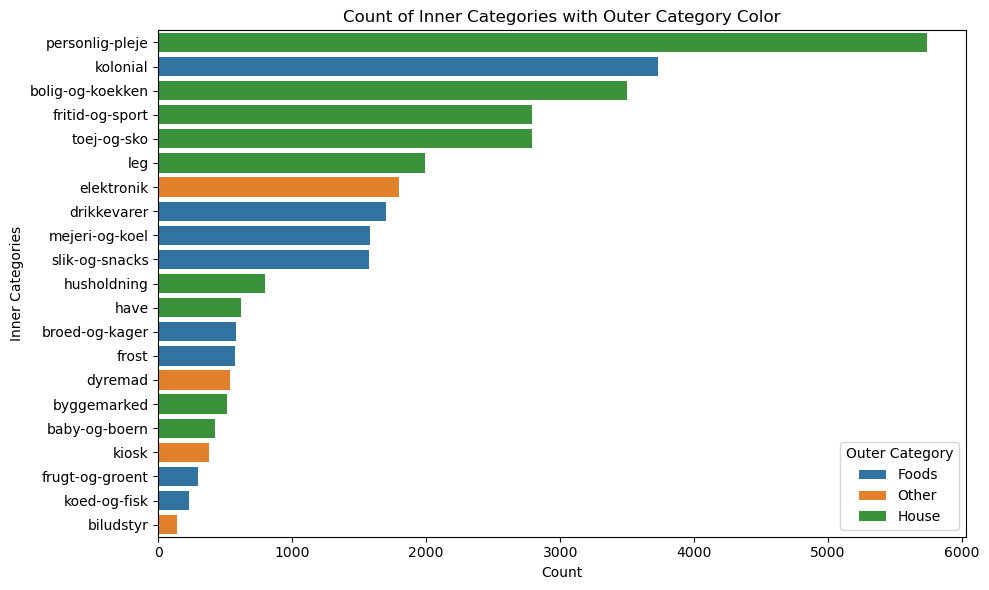

outer_category
House    19163
Foods    10269
Other     2853
Name: count, dtype: int64

In [255]:
plt.figure(figsize=(10, 6))
sns.countplot(y='category', data=df_products, hue='outer_category', order=df_products['category'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Inner Categories')
plt.title('Count of Inner Categories with Outer Category Color')
plt.legend(title='Outer Category')
plt.tight_layout()
plt.show()

df_products['outer_category'].value_counts()

The plot shows the distribution of products across the different categories. The categories are divided into 3 main categories: 'Food', 'House' and 'Other'. The Food category contains 10.269 products, the House category contains 19.163 products and the Other category contains 2.853 products.

In this project we will be focusing on the Food category.

### Textual data <a id="text_section">

In [256]:
df_text = df_text.rename(columns = {'p_id':'product_id'})
no_description = df_text[df_text['descriptions'].isnull()]['descriptions'].value_counts()   # Check for missing descriptions

print(f"There are {no_description.sum()} missing descriptions in the dataset")

df_text['description_length'] = df_text['descriptions'].str.split().str.len()

There are 0 missing descriptions in the dataset


In [257]:
phrase_to_remove = "Om SallingSalling er navnet på over 6000 af vores egne varer. Varer, der er udviklet, designet og opkaldt efter vores grundlægger Herman Salling. Salling-serien er hverdagsvarer af god kvalitet til gode priser. I serien finder du alt fra dåsetomater, pålæg og toiletpapir – til dyremad og boligtilbehør. Det er attraktive og ordentlige varer, med en kvalitet, der hverken koster for lidt eller for meget. Salling finder du kun på hylderne i Salling Groups tilhørende supermarkeder."
phrase_to_remove2 = "Om SlagterenSlagteren har et stort og bredt udvalg af godt kød til en god pris – både hverdags- og weekendkød. I sortimentet findes mange nemme convenience-løsninger og udskæringer inden for okse og gris."
phrase_to_remove3 = 'Om Salling ØKOSalling ØKO er en serie bestående af økologiske dagligvarer. Her findes dagligvarer inden for frugt og grønt, frostvarer, ferskvarer, kolonialvarer samt varer fra mejeri og køl, husholdning og personlig pleje. Kort sagt så gør Salling ØKO det nemmere at få mere økologisk kvalitet ind i hverdagen."'
phrase_to_remove4 = 'Om Salling ØKOSalling ØKO er en serie bestående af økologiske dagligvarer. Her findes dagligvarer inden for frugt og grønt, frostvarer, ferskvarer, kolonialvarer samt varer fra mejeri og køl, husholdning og personlig pleje. Kort sagt så gør Salling ØKO det nemmere at få mere økologisk kvalitet ind i hverdagen.'
phrase_to_remove5 = '  Om Salling NU Salling NU er vores convenience varer, der kan give en hjælpende hånd i en travl hverdag. Det er en serie bestående af færdigretter, salater og færdige elementer til for eksempel salater. Med Salling NU er der fokus på kvalitet og tilgængelighed med produkter, der enten skal varmes eller spises, som de er. Det er moderne varer til moderne kunder."'
phrase_to_remove6 = 'Om Salling NU Salling NU er vores convenience varer, der kan give en hjælpende hånd i en travl hverdag. Det er en serie bestående af færdigretter, salater og færdige elementer til for eksempel salater. Med Salling NU er der fokus på kvalitet og tilgængelighed med produkter, der enten skal varmes eller spises, som de er. Det er moderne varer til moderne kunder."'
phrase_to_remove7 = 'Om Salling NU Salling NU er vores convenience varer, der kan give en hjælpende hånd i en travl hverdag. Det er en serie bestående af færdigretter, salater og færdige elementer til for eksempel salater. Med Salling NU er der fokus på kvalitet og tilgængelighed med produkter, der enten skal varmes eller spises, som de er. Det er moderne varer til moderne kunder.'

df_text['descriptions'] = df_text['descriptions'].str.replace(phrase_to_remove, '')
df_text['descriptions'] = df_text['descriptions'].str.replace(phrase_to_remove2, '')
df_text['descriptions'] = df_text['descriptions'].str.replace(phrase_to_remove3, '')
df_text['descriptions'] = df_text['descriptions'].str.replace(phrase_to_remove4, '')
df_text['descriptions'] = df_text['descriptions'].str.replace(phrase_to_remove5, '')
df_text['descriptions'] = df_text['descriptions'].str.replace(phrase_to_remove6, '')
df_text['descriptions'] = df_text['descriptions'].str.replace(phrase_to_remove7, '')

# Merge the data

In [258]:
df_clean = pd.merge(df_products, df_neighbours, on='product_id', how='inner')
df_clean = pd.merge(df_clean, df_text, on='product_id', how='inner')

df_clean = df_clean[df_clean['neighbor_products_id'].apply(lambda x: len(x) > 0)]
df_clean = df_clean[df_clean['descriptions'].apply(lambda x: x != "No description available")]

/var/folders/vg/smyn0xpj4txbs4bxknnvc4zw0000gn/T/ipykernel_36136/1085560824.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df_clean['description_length'], hist=True)


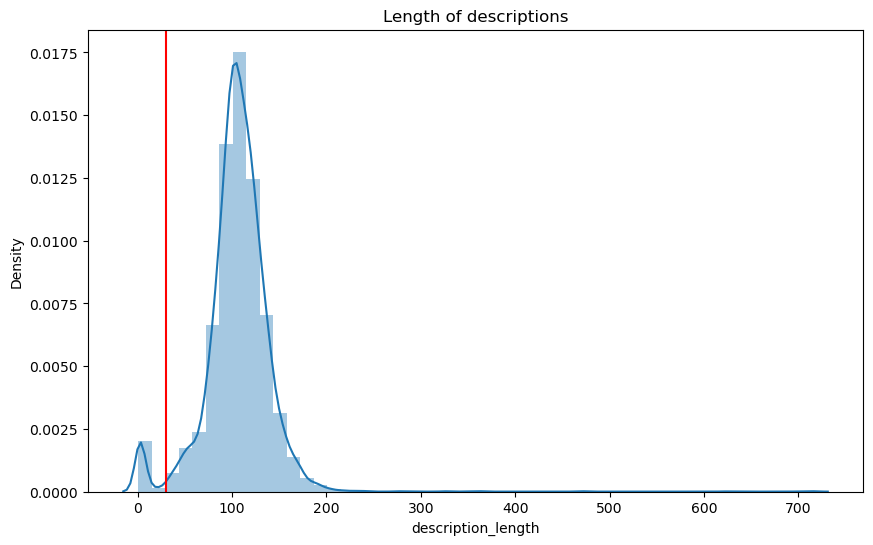

In [259]:
#plot the length of the descriptions for the products
plt.figure(figsize=(10,6))
sns.distplot(a=df_clean['description_length'], hist=True)
plt.axvline(30, c='r')
plt.title('Length of descriptions')
plt.show()

### Filtering for the description word length

In [260]:
df_clean = df_clean.loc[df_clean['description_length'] >= 30]
df_clean = df_clean.loc[df_clean['category'] != 'kiosk']
df_clean.describe()

,product_id,price_amount,description_length
count,9951.000000,9943.000000,9951.000000
mean,77259.978696,140.915840,108.639132
std,34722.070991,140.255706,25.699823
min,14532.000000,0.020000,31.000000
25%,51340.500000,50.000000,94.000000
50%,81929.000000,102.670000,107.000000
75%,108807.500000,178.570000,124.000000
max,133516.000000,998.570000,325.000000


In [261]:
df_clean.to_csv('data/df_clean.csv', index=False)